In [109]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

### 0.Описание задачи
этот набор данных включает в себя данные по 18208 футболистам и данным их рейтингов в игре Fifa19, включая следующие столбцы
1. Игрок
2. Команда
3. Возраст
4. Национальность
5. Общий рейтинг
6. Клуб
7. Цена
8. Зарплата
9. Рост
10. Вес
11. Игровые характеристики

### 1.Чтение данных из файла

In [110]:
data = pd.read_csv('./new.csv', sep=',',engine = 'python')


In [111]:
del data['Unnamed: 0']


In [112]:
data


,ID,Name,Age,Nationality,Overall,Potential,Club,Value(M $),Wage(K $),Special,...,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause(M),Post
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,565,2202.0,...,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,226.500,FRW
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77,405,2228.0,...,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,127.100,FRW
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,290,2143.0,...,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,228.100,FRW
3,193080,De Gea,27,Spain,91,93,Manchester United,72,260,1471.0,...,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,138.600,GK
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102,355,2281.0,...,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,196.400,MED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,0.06,1,1307.0,...,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,0.143,MED
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,0.06,1,1098.0,...,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,0.113,FRW
18204,241638,B. Worman,16,England,47,67,Cambridge United,0.06,1,1189.0,...,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,0.165,FRW
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,0.06,1,1228.0,...,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,0.143,FRW


In [113]:
data.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value(M $)', 'Wage(K $)', 'Special', 'Preferred Foot', 'Weak Foot',
       'Skill Moves', 'Real Face', 'Position', 'Jersey Number', 'Height',
       'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'Release Clause(M)', 'Post'],
      dtype='object')

### 2. Визуализация данных и вычисление основных характеристик

Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

In [114]:
data.describe()

,ID,Age,Overall,Potential,Special,Weak Foot,Skill Moves,Jersey Number,Height,Weight,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause(M)
count,18207.000000,18207.000000,18207.000000,18207.000000,18179.000000,18159.000000,18131.000000,18119.000000,18179.000000,18179.000000,...,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.947907,2.942673,2.361701,19.544401,180.756367,75.095770,...,55.872649,46.696762,49.967349,53.407424,48.560807,58.658541,47.276212,47.697149,45.660030,4.204782
std,29965.244204,4.669943,6.908930,6.136496,272.585019,0.670008,0.756292,15.952570,11.496688,8.053773,...,17.371631,20.700188,19.527141,14.145761,15.706617,11.432878,19.909676,21.670806,21.296616,10.725056
min,16.000000,16.000000,46.000000,48.000000,731.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,0.000000
25%,200315.500000,21.000000,62.000000,67.000000,1458.000000,3.000000,2.000000,8.000000,175.000000,70.000000,...,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,0.397500
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,3.000000,2.000000,17.000000,180.000000,75.000000,...,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,1.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,3.000000,3.000000,26.000000,185.000000,80.000000,...,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,3.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,99.000000,206.000000,110.000000,...,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,228.100000


Так же получим информацию о категориальных

In [115]:
data.describe(include = [object])



,Name,Nationality,Club,Value(M $),Wage(K $),Preferred Foot,Real Face,Position,Post
count,18207,18207,17966,18207,18207,18131,18131,18119,18119
unique,17189,164,651,218,145,2,2,13,4
top,J. Rodr?guez,England,Empoli,1.1,1,Right,No,CB,MED
freq,11,1662,33,431,4894,13925,16477,3083,6900


Зависимость общего рейтинга (OR) от суммы всех игровых стат(IGS), разделенных по позиции

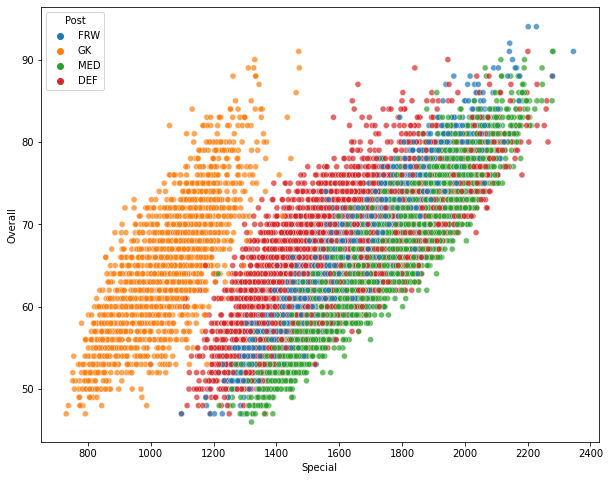

In [116]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='Special', y='Overall', hue='Post', data=data, alpha=0.7)
pass

мы видим, четкое разделение между 'Облаком' вратарей и полевыми игроками, это разделение интуитивно понятно, т.к. большинство игровых стат для полевых игроков поэтому даже у слабых полевых игроков их сумма будет больше, чем у лучших вратарей

Гистограмма ОR

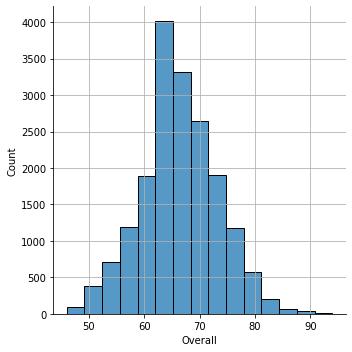

In [117]:
sns.displot(data['Overall'],bins= 15)
plt.grid()
pass

Гистограмма IGS

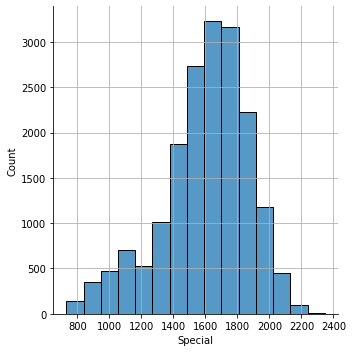

In [118]:
sns.displot(data['Special'],bins= 15)
plt.grid()
pass

Ящик с усами для ОR

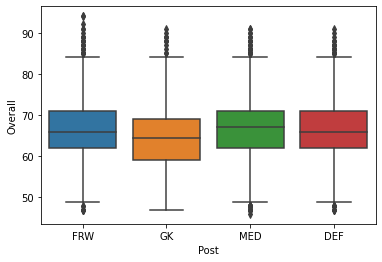

In [119]:
sns.boxplot(x="Post", y="Overall", data=data)
pass

тут видно, что средний рейтинг вратарей ниже рейтинга полевых игроков

Ящик с уами для IGS

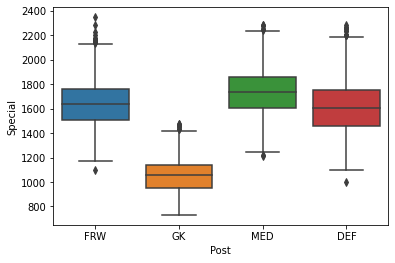

In [120]:
sns.boxplot(x="Post", y="Special", data=data)
pass

мы видим, общий IGS вратарей низкий ( но это мы объясняли раньше) , Так же видим, что самый высокий IGS у полузащитников, что тоже интуитивно понятно, т.к. полузащитникам нужно обладать максимальным набором навыков, большим чем нападающие и защитники

Скрипичный график для ОR

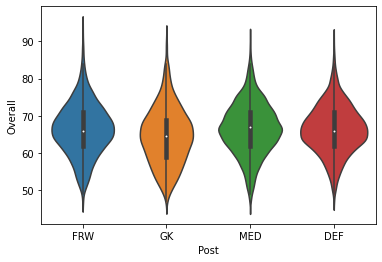

In [121]:
sns.violinplot(x="Post", y="Overall", data=data)
pass

Скрипичный график для IGS

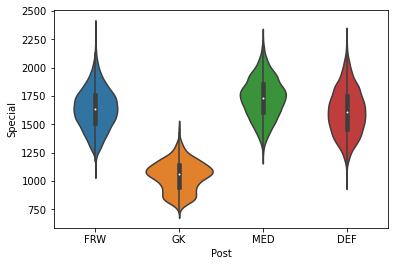

In [122]:
sns.violinplot(x="Post", y="Special", data=data)
pass

Исключим ID игрока и построим матрицу корреляции

In [123]:
dk=data.iloc[:, 1:49]

corr_mat=dk.corr()
corr_mat


,Age,Overall,Potential,Special,Weak Foot,Skill Moves,Jersey Number,Height,Weight,Crossing,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause(M)
Age,1.000000,0.452350,-0.253312,0.236463,0.058103,0.027554,-0.240937,0.049835,0.201663,0.130530,...,0.265289,0.198016,0.082007,0.186988,0.139586,0.390811,0.143179,0.119742,0.103106,0.066868
Overall,0.452350,1.000000,0.660939,0.606927,0.214651,0.414219,-0.218631,0.048611,0.149242,0.394810,...,0.395513,0.321785,0.356110,0.498707,0.340990,0.727225,0.287548,0.252711,0.223071,0.589219
Potential,-0.253312,0.660939,1.000000,0.383630,0.166782,0.354071,-0.010327,0.024788,0.010923,0.246046,...,0.170935,0.155122,0.245448,0.348129,0.223784,0.439176,0.163614,0.143591,0.129190,0.548134
Special,0.236463,0.606927,0.383630,1.000000,0.341878,0.763322,-0.133495,-0.220249,-0.233057,0.866474,...,0.666387,0.561804,0.824188,0.761991,0.734371,0.752802,0.562277,0.538821,0.507119,0.350967
Weak Foot,0.058103,0.214651,0.166782,0.341878,1.000000,0.340675,-0.035551,-0.174706,-0.130470,0.307849,...,0.132013,0.053044,0.346879,0.338054,0.330236,0.278907,0.065420,0.042661,0.026147,0.149558
Skill Moves,0.027554,0.414219,0.354071,0.763322,0.340675,1.000000,-0.034958,-0.423324,-0.352457,0.741167,...,0.347766,0.209485,0.781299,0.674127,0.690251,0.587144,0.241558,0.210305,0.178591,0.288916
Jersey Number,-0.240937,-0.218631,-0.010327,-0.133495,-0.035551,-0.034958,1.000000,-0.039250,-0.086511,-0.076431,...,-0.146824,-0.158692,-0.025068,-0.077468,-0.027713,-0.167253,-0.142702,-0.133353,-0.124693,-0.089615
Height,0.049835,0.048611,0.024788,-0.220249,-0.174706,-0.423324,-0.039250,1.000000,0.777827,-0.488072,...,-0.043636,-0.051202,-0.436492,-0.370237,-0.341349,-0.136762,-0.074975,-0.060222,-0.068331,0.001287
Weight,0.201663,0.149242,0.010923,-0.233057,-0.130470,-0.352457,-0.086511,0.777827,1.000000,-0.394781,...,0.031356,-0.025950,-0.351817,-0.285505,-0.254553,-0.036317,-0.049487,-0.047426,-0.056726,0.037601
Crossing,0.130530,0.394810,0.246046,0.866474,0.307849,0.741167,-0.076431,-0.488072,-0.394781,1.000000,...,0.473595,0.427736,0.783189,0.685132,0.645676,0.575921,0.443281,0.428920,0.409956,0.230769


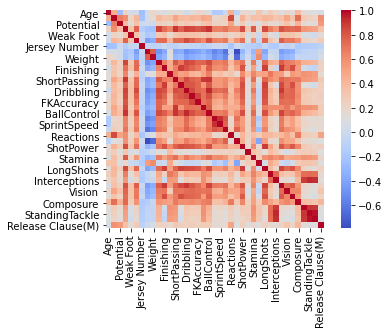

In [124]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

сделаем корреляцию игровых характеристик

In [125]:
igr=data.iloc[:, 19:48]
igr_corr=igr.corr()
igr_corr



,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause(M)
Finishing,1.000000,0.473175,0.661695,0.882677,0.824395,0.759051,0.697366,0.512488,0.788287,0.606599,...,0.242751,-0.020994,0.888848,0.697143,0.837818,0.533471,0.024323,-0.033376,-0.071989,0.232855
HeadingAccuracy,0.473175,1.000000,0.640029,0.505447,0.550770,0.440739,0.407821,0.510614,0.658240,0.329385,...,0.692897,0.548755,0.533642,0.275470,0.551803,0.507682,0.583489,0.561043,0.533678,0.168741
ShortPassing,0.661695,0.640029,1.000000,0.698330,0.843810,0.775439,0.736769,0.895675,0.911574,0.565700,...,0.611649,0.543470,0.757765,0.713640,0.675878,0.685663,0.559860,0.541078,0.508711,0.305384
Volleys,0.882677,0.505447,0.698330,1.000000,0.809722,0.807251,0.749642,0.570932,0.794949,0.572208,...,0.330121,0.088440,0.848380,0.699447,0.829163,0.595547,0.121291,0.072719,0.035499,0.258664
Dribbling,0.824395,0.550770,0.843810,0.809722,1.000000,0.842733,0.753607,0.722503,0.939039,0.748325,...,0.441176,0.296001,0.896989,0.730286,0.769574,0.598024,0.336240,0.301158,0.274007,0.249304
Curve,0.759051,0.440739,0.775439,0.807251,0.842733,1.000000,0.861193,0.710752,0.829585,0.607400,...,0.399436,0.273751,0.811008,0.744743,0.751743,0.616862,0.289787,0.261448,0.232965,0.262845
FKAccuracy,0.697366,0.407821,0.736769,0.749642,0.753607,0.861193,1.000000,0.703607,0.759516,0.498316,...,0.396354,0.295396,0.729431,0.717275,0.734444,0.585607,0.298257,0.279151,0.248104,0.242787
LongPassing,0.512488,0.510614,0.895675,0.570932,0.722503,0.710752,0.703607,1.000000,0.788704,0.442486,...,0.590618,0.597091,0.614325,0.698314,0.541986,0.646171,0.587459,0.587548,0.562442,0.283418
BallControl,0.788287,0.658240,0.911574,0.794949,0.939039,0.829585,0.759516,0.788704,1.000000,0.675939,...,0.549999,0.418592,0.863973,0.718534,0.769658,0.675318,0.453096,0.417517,0.384935,0.284181
Acceleration,0.606599,0.329385,0.565700,0.572208,0.748325,0.607400,0.498316,0.442486,0.675939,1.000000,...,0.250193,0.151912,0.682420,0.461617,0.532951,0.348261,0.195070,0.162736,0.157402,0.158739


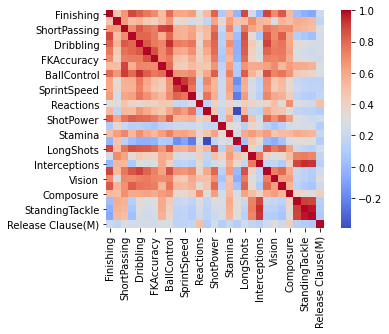

In [126]:
sns.heatmap(igr_corr, square=True, cmap='coolwarm')
pass

Разделим игровые характеристики на характеристики атаки защиты и полузащиты

Например корреляция защиты

In [127]:
dd=data.iloc[:, [21,35,37,39,45,46,40,47]]
corr_dd=dd.corr()
corr_dd

,ShortPassing,Stamina,LongShots,Interceptions,StandingTackle,SlidingTackle,Positioning,Release Clause(M)
ShortPassing,1.000000,0.716685,0.761828,0.543470,0.541078,0.508711,0.757765,0.305384
Stamina,0.716685,1.000000,0.596356,0.576272,0.569895,0.544590,0.641067,0.196495
LongShots,0.761828,0.596356,1.000000,0.193602,0.172077,0.133544,0.861113,0.253163
Interceptions,0.543470,0.576272,0.193602,1.000000,0.941523,0.928318,0.170759,0.137452
StandingTackle,0.541078,0.569895,0.172077,0.941523,1.000000,0.974719,0.157836,0.108381
SlidingTackle,0.508711,0.544590,0.133544,0.928318,0.974719,1.000000,0.124122,0.089779
Positioning,0.757765,0.641067,0.861113,0.170759,0.157836,0.124122,1.000000,0.235672
Release Clause(M),0.305384,0.196495,0.253163,0.137452,0.108381,0.089779,0.235672,1.000000


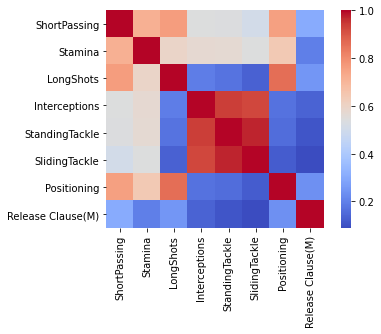

In [128]:
sns.heatmap(corr_dd, square=True, cmap='coolwarm')
pass

Все корреляци выше чем 0.3 сильная связь наблюдается между SlidingTackle, StandingTackle, Interceptions и Marking

корреляция атака

In [129]:
at=data.iloc[:, [20,23,24,25,29,30,31,32,41,43,44]]
corr_at=at.corr()
corr_at

,HeadingAccuracy,Dribbling,Curve,FKAccuracy,SprintSpeed,Agility,Reactions,Balance,Vision,Composure,Marking
HeadingAccuracy,1.000000,0.550770,0.440739,0.407821,0.379529,0.260832,0.326156,0.169280,0.275470,0.507682,0.583489
Dribbling,0.550770,1.000000,0.842733,0.753607,0.726980,0.765504,0.369136,0.663437,0.730286,0.598024,0.336240
Curve,0.440739,0.842733,1.000000,0.861193,0.578900,0.682695,0.413188,0.587558,0.744743,0.616862,0.289787
FKAccuracy,0.407821,0.753607,0.861193,1.000000,0.466815,0.590508,0.398022,0.521814,0.717275,0.585607,0.298257
SprintSpeed,0.379529,0.726980,0.578900,0.466815,1.000000,0.763720,0.192641,0.643586,0.429600,0.352283,0.212402
Agility,0.260832,0.765504,0.682695,0.590508,0.763720,1.000000,0.276512,0.770410,0.597807,0.433947,0.167179
Reactions,0.326156,0.369136,0.413188,0.398022,0.192641,0.276512,1.000000,0.150037,0.502382,0.685373,0.284413
Balance,0.169280,0.663437,0.587558,0.521814,0.643586,0.770410,0.150037,1.000000,0.492129,0.311994,0.178640
Vision,0.275470,0.730286,0.744743,0.717275,0.429600,0.597807,0.502382,0.492129,1.000000,0.636437,0.177145
Composure,0.507682,0.598024,0.616862,0.585607,0.352283,0.433947,0.685373,0.311994,0.636437,1.000000,0.385185


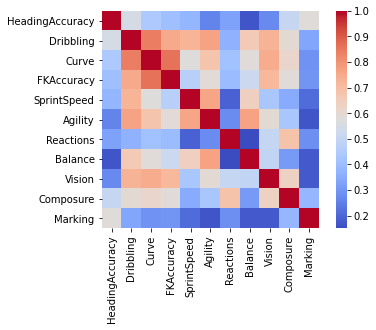

In [130]:
sns.heatmap(corr_at, square=True, cmap='coolwarm')
pass

все корреляции больше 0.2
есть группа сильно коррелированных признаков Finishing,Volleys,Dribbling,Curve,Positioning,Penalties

так же сильную корреляцию имеет пара Acceleration SprintSpeed


корреляция полузащиты

In [131]:
pz=data.iloc[:, [22,27,28,32,36,38,42]]
corr_pz=pz.corr()
corr_pz

,Volleys,BallControl,Acceleration,Balance,Strength,Aggression,Penalties
Volleys,1.000000,0.794949,0.572208,0.514236,0.029067,0.330121,0.829163
BallControl,0.794949,1.000000,0.675939,0.601564,0.087383,0.549999,0.769658
Acceleration,0.572208,0.675939,1.000000,0.711627,-0.166443,0.250193,0.532951
Balance,0.514236,0.601564,0.711627,1.000000,-0.390668,0.184641,0.483275
Strength,0.029067,0.087383,-0.166443,-0.390668,1.000000,0.474039,0.054054
Aggression,0.330121,0.549999,0.250193,0.184641,0.474039,1.000000,0.335978
Penalties,0.829163,0.769658,0.532951,0.483275,0.054054,0.335978,1.000000


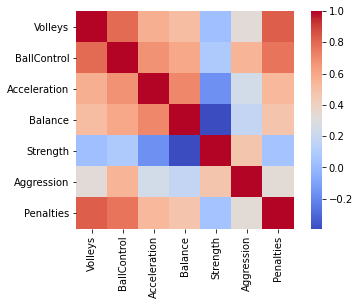

In [132]:
sns.heatmap(corr_pz, square=True, cmap='coolwarm')
pass

все корреляции больше 0.4
сильную корреляцию имеет пара ShortPassing и LongPassing а также пара ShortPassing и BallControl

### 3.Обработка пропущенных значений

посмотрим на количество пропущенных значений

In [133]:
data.isna().sum()

ID                     0
Name                   0
Age                    0
Nationality            0
Overall                0
Potential              0
Club                 241
Value(M $)             0
Wage(K $)              0
Special               28
Preferred Foot        76
Weak Foot             48
Skill Moves           76
Real Face             76
Position              88
Jersey Number         88
Height                28
Weight                28
Crossing              76
Finishing             76
HeadingAccuracy       28
ShortPassing          76
Volleys               76
Dribbling             76
Curve                 76
FKAccuracy            76
LongPassing           76
BallControl           76
Acceleration          76
SprintSpeed           76
Agility               76
Reactions             76
Balance               76
ShotPower             76
Jumping               76
Stamina               76
Strength              76
LongShots             76
Aggression            76
Interceptions         76


Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам

In [134]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)

In [135]:
data.isna().sum()

ID                     0
Name                   0
Age                    0
Nationality            0
Overall                0
Potential              0
Club                 241
Value(M $)             0
Wage(K $)              0
Special                0
Preferred Foot        76
Weak Foot              0
Skill Moves            0
Real Face             76
Position              88
Jersey Number          0
Height                 0
Weight                 0
Crossing               0
Finishing              0
HeadingAccuracy        0
ShortPassing           0
Volleys                0
Dribbling              0
Curve                  0
FKAccuracy             0
LongPassing            0
BallControl            0
Acceleration           0
SprintSpeed            0
Agility                0
Reactions              0
Balance                0
ShotPower              0
Jumping                0
Stamina                0
Strength               0
LongShots              0
Aggression             0
Interceptions          0


Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой:

In [136]:
data['Club'].fillna(data['Club'].mode().iloc[0], inplace=True)
data['Preferred Foot'    ].fillna(data['Preferred Foot'    ].mode().iloc[0], inplace=True)
data['Real Face'].fillna(data['Real Face'].mode().iloc[0], inplace=True)
data['Position'    ].fillna(data['Position'    ].mode().iloc[0], inplace=True)
data['Post'    ].fillna(data['Post'    ].mode().iloc[0], inplace=True)

In [137]:
data.isna().sum()

ID                   0
Name                 0
Age                  0
Nationality          0
Overall              0
Potential            0
Club                 0
Value(M $)           0
Wage(K $)            0
Special              0
Preferred Foot       0
Weak Foot            0
Skill Moves          0
Real Face            0
Position             0
Jersey Number        0
Height               0
Weight               0
Crossing             0
Finishing            0
HeadingAccuracy      0
ShortPassing         0
Volleys              0
Dribbling            0
Curve                0
FKAccuracy           0
LongPassing          0
BallControl          0
Acceleration         0
SprintSpeed          0
Agility              0
Reactions            0
Balance              0
ShotPower            0
Jumping              0
Stamina              0
Strength             0
LongShots            0
Aggression           0
Interceptions        0
Positioning          0
Vision               0
Penalties            0
Composure  

### 4.Бинаризация номинальных признаков

Бинаризуем параметр Preferred Foot

In [138]:
data['Preferred Foot'] = pd.factorize(data['Preferred Foot'])[0]
data['Preferred Foot']

0        0
1        1
2        1
3        1
4        1
        ..
18202    1
18203    1
18204    1
18205    1
18206    1
Name: Preferred Foot, Length: 18207, dtype: int32

Бинаризуем параметр Real Face

In [139]:
data['Real Face'] = pd.factorize(data['Real Face'])[0]
data['Real Face']



0        0
1        0
2        0
3        0
4        0
        ..
18202    1
18203    1
18204    1
18205    1
18206    1
Name: Real Face, Length: 18207, dtype: int32

### 5.Cтандартизуем данные

In [140]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand.describe()

,Acceleration,Age,Aggression,Agility,Balance,BallControl,Composure,Crossing,Curve,Dribbling,...,SlidingTackle,Special,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,Weak Foot,Weight
count,1.820700e+04,1.820700e+04,1.820700e+04,1.820700e+04,1.820700e+04,1.820700e+04,1.820700e+04,1.820700e+04,1.820700e+04,1.820700e+04,...,1.820700e+04,1.820700e+04,1.820700e+04,1.820700e+04,1.820700e+04,1.820700e+04,1.820700e+04,1.820700e+04,1.820700e+04,1.820700e+04
mean,-4.620655e-16,1.623473e-16,3.746477e-17,1.873238e-16,2.279107e-16,1.748356e-16,-1.498591e-16,-4.995302e-17,-1.748356e-16,-2.497651e-17,...,-1.061502e-16,-4.995302e-17,-6.244128e-18,2.123004e-16,-8.741779e-17,-2.747416e-16,2.497651e-16,-1.123943e-16,2.684975e-16,-1.342488e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.532414e+00,-1.953387e+00,-2.589086e+00,-3.360725e+00,-3.401299e+00,-3.207251e+00,-4.878832e+00,-2.442002e+00,-2.243364e+00,-2.723230e+00,...,-2.008204e+00,-3.183080e+00,-3.606659e+00,-3.229211e+00,-2.114020e+00,-3.858783e+00,-3.075396e+00,-2.204321e+00,-4.397981e+00,-9.331456e+00
25%,-5.117771e-01,-8.827101e-01,-6.855881e-01,-5.776330e-01,-5.650657e-01,-2.643260e-01,-6.717439e-01,-6.416375e-01,-7.181592e-01,-3.391663e-01,...,-1.020250e+00,-5.140073e-01,-5.292082e-01,-4.557786e-01,-9.582528e-01,-5.851134e-01,-6.668806e-01,-7.319703e-01,8.544790e-02,-6.331871e-01
50%,1.594755e-01,-2.616857e-02,1.796381e-01,1.690501e-01,1.439925e-01,2.762112e-01,1.170850e-01,2.312666e-01,4.444310e-02,2.965839e-01,...,2.970216e-01,1.358221e-01,1.546698e-01,1.745469e-01,3.362066e-01,1.334970e-01,1.123451e-01,6.083398e-02,8.544790e-02,-1.188215e-02
75%,6.964776e-01,6.162376e-01,7.564555e-01,7.120924e-01,7.112391e-01,6.365693e-01,7.306186e-01,7.768317e-01,8.070454e-01,6.674382e-01,...,8.615668e-01,6.901963e-01,7.017721e-01,6.788073e-01,8.447442e-01,6.924162e-01,7.498934e-01,7.970094e-01,8.544790e-02,6.094228e-01
max,2.173233e+00,4.256539e+00,2.256181e+00,2.205459e+00,2.271167e+00,2.258181e+00,3.272401e+00,2.358970e+00,2.550136e+00,2.203834e+00,...,2.131793e+00,2.746154e+00,2.137916e+00,2.065524e+00,2.092973e+00,2.528865e+00,2.875054e+00,2.665762e+00,3.074401e+00,4.337252e+00


In [141]:
dd=data_stand.drop(['ID','Name','Nationality','Club','Post','Value(M $)', 'Wage(K $)','Position'], axis=1)

In [142]:
dd.columns

Index(['Acceleration', 'Age', 'Aggression', 'Agility', 'Balance',
       'BallControl', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'FKAccuracy', 'Finishing', 'HeadingAccuracy', 'Height', 'Interceptions',
       'Jersey Number', 'Jumping', 'LongPassing', 'LongShots', 'Marking',
       'Overall', 'Penalties', 'Positioning', 'Potential', 'Preferred Foot',
       'Reactions', 'Real Face', 'Release Clause(M)', 'ShortPassing',
       'ShotPower', 'Skill Moves', 'SlidingTackle', 'Special', 'SprintSpeed',
       'Stamina', 'StandingTackle', 'Strength', 'Vision', 'Volleys',
       'Weak Foot', 'Weight'],
      dtype='object')

### 6.Разбиваем выборку на обучающую и тестовую

In [143]:
X=dd.copy()
y = data['Post']

разобьем выборку на обучающую 70% и тестовую 30%

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print(N_train, N_test)




12744 5463


### 7.Работа с классификатором ближайших соседей. Вычисление ошибок на обучающей и тестовой выборках.

Воспользуемся методом ближайших соседей. Пусть сначала число соседей = 10.

In [145]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.14021599853560315

ошибка составляет 14%


Пусть теперь число соседей = 5.

In [146]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.15101592531576058

ошибка составляет 15%

Пусть число соседей = 20.

In [147]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 20)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.13088046860699248

ошибка составляет 13%

Пусть число соседей = 100.

In [148]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 100)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.13179571663920922

ошибка составляет 13%

Пусть число соседей = 35.

In [149]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 35)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.1281347245103423

ошибка составляет 12%

Пусть число соседей = 1.

In [150]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.19220208676551345

ошибка составляет 19%

Теперь попробуем прогнозить только по 3-м параметрам рост вес и стоимость

In [151]:
dpar=data_stand[['Height', 'Weight','Release Clause(M)']]
dpar

,Height,Weight,Release Clause(M)
0,-0.936222,-0.384665,20.767497
1,0.630647,0.982206,11.481805
2,-0.500980,-0.881709,20.916965
3,1.065888,0.112379,12.556105
4,-0.065739,-0.633187,17.955632
...,...,...,...
18202,-0.500980,-1.751536,-0.378192
18203,0.891792,0.236640,-0.380994
18204,-0.675077,-1.005970,-0.376136
18205,-0.239836,-0.633187,-0.378192


Разбиваем выборку на обучающую и тестовую

In [152]:
X=dpar.copy()
y = data['Post']

разобьем выборку на обучающую 70% и тестовую 30%

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print(N_train, N_test)



12744 5463


Пусть сначала число соседей = 10.

In [154]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.5617792421746294

ошибка составляет 56%

Пусть число соседей = 100.

In [155]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 100)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.5218744279699798

ошибка составляет 52%

Пусть число соседей = 1.

In [156]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.6333516382939777

ошибка составляет 63%

теперь сделаем классификацию только по игровым характеристикам

In [157]:
digr=data.iloc[:,18:47]
digr.columns

Index(['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle'],
      dtype='object')

разобьем выборку на обучающую 70% и тестовую 30%

In [158]:
X=digr.copy()
y = data['Post']

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print(N_train, N_test)



12744 5463


Пусть сначала число соседей = 10.

In [160]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.12557203002013545

ошибка составляет 12%

Пусть число соседей = 100.

In [161]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 100)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.12483983159436207

ошибка составляет 12%

Пусть число соседей = 1.

In [162]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.17536152297272561

ошибка составляет 17%

### Вывод:

 Мы провели классификацию, позиция лучше всего классифицируется по игровым характеристикам чем по росту и весу, и цене что предсказуемо. Классификация по росту весу и цене не очень хорошая, так как параметры слишком общие.

Так же лучший результат получился при высоком числе(>20)  ближайших соседей